# MLSP Programming Assignment Q2

### Submitted by : Vatsalya Gupta, SC19B098, B.Tech. ECE VII Semester

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = 'P2_train.csv'
test_data = 'P2_test.csv'

In [3]:
dRows = []
tdRows = []
with open(train_data, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        dRows.append(row)
with open(test_data, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        tdRows.append(row)

In [4]:
temp = []
c0 = []
c1 = []
iter1 = 0
for y in dRows:
    temp.append([float(x) for x in y])

label1 = [x[2] for x in temp]
for row in label1:
    if(row == 0.0):
        c0.append([temp[iter1][x] for x in range(0,2)])
    elif(row == 1.0):
        c1.append([temp[iter1][x] for x in range(0,2)])
    iter1 += 1

In [5]:
temp = []
t0 = []
t1 = []
iter2 = 0
for y in tdRows:
    temp.append([float(x) for x in y])
    
label2 = [x[2] for x in temp]

for row in label2:
    if(row == 0.0):
        t0.append([temp[iter2][x] for x in range(0,2)])
    elif(row == 1.0):
        t1.append([temp[iter2][x] for x in range(0,2)])
    iter2 += 1 

In [6]:
prior0 = len(c0) / (len(c0) + len(c1))
prior1 = len(c1) / (len(c0) + len(c1))

In [7]:
c0_mean = np.mean(c0, axis = 0)
c1_mean = np.mean(c1, axis = 0)
cov_c0 = np.cov(np.transpose(c0))
cov_c1 = np.cov(np.transpose(c1))

In [8]:
def gaussian(temp, cov_c0_, cov_c1_, c0_mean_, c1_mean_):
    p0 = []
    p1 = []
    p0_new = []
    p1_new = []
    temp2 = [x[0:2] for x in temp]
    length = len(temp2)
    for i in range(0,length):
        p0.append((1/((2* np.pi)*np.power(np.linalg.det(cov_c0_),0.5))) *(np.exp (-0.5 * (np.linalg.multi_dot([(temp2[i] - c0_mean_) , (np.linalg.inv(cov_c0_)), (temp2[i] - c0_mean_).T])) )) )
        p1.append((1/((2* np.pi)*np.power(np.linalg.det(cov_c1_),0.5))) *(np.exp (-0.5 * (np.dot(np.dot((temp2[i] - c1_mean_) , np.linalg.inv(cov_c1_)), np.transpose(temp2[i] - c1_mean_))))) )
    p0_new = [i*prior0 for i in p0]
    p1_new = [i*prior1 for i in p1]
    return p0_new, p1_new

In [9]:
def classify_data(temp, p0_new, p1_new):
    classify = []
    confusion = []
    temp2 = [x[0:2] for x in temp]
    length = len(temp2)
    for i in range(0, length):
        if p0_new[i] < p1_new[i]:
            classify.append(1)
        elif p1_new[i] < p0_new[i]:
            classify.append(0)
    
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(0, length):
        if classify[i] == 1 and label2[i] == 1:
            tp += 1
        if classify[i] == 0 and label2[i] == 0:
            tn += 1
        if classify[i] == 0 and label2[i] == 1:
            fn += 1
        if classify[i] == 1 and label2[i] == 0:
            fp += 1

    print("Total Samples:", fn + tp + tn + fp)
    print("Accuracy for class 1:", tp / (fn + tp))
    print("Accuracy for class 0:", tn / (tn + fp))
    print("Total Accuracy:", (tp + tn)/(fn + tp + tn + fp))

    confusion = [[tn, fp],[fn, tp]]
    print("Confusion Matrix:", confusion)
    misclass0 = fp / (fp + tn)
    misclass1 = fn / (fn + tp)
    print("Misclassification Error for class 0:", misclass0)
    print("Misclassification Error for class 1:", misclass1)

In [10]:
def bivariate_normal(X, Y, sigmax, sigmay,
                     mux, muy, sigmaxy):
    Xmu = X - mux
    Ymu = Y - muy

    rho = sigmaxy / (sigmax * sigmay)
    z = Xmu ** 2 / sigmax ** 2 + Ymu ** 2 / sigmay ** 2 - 2 * rho * Xmu * Ymu / (sigmax * sigmay)
    denom = 2 * np.pi * sigmax * sigmay * np.sqrt(1-rho**2)
    return np.exp(-z / (2 * (1 - rho ** 2))) / denom

def plotting(cov_c2, cov_c3, c2_mean, c3_mean):
    z3 = []
    z4 = []
    x = np.linspace(-4, 4, 90)
    y = np.linspace(-8, 8, 90)
    X, Y = np.meshgrid(x, y)
    z = bivariate_normal(X, Y, cov_c2[0][0] ** 0.5, cov_c2[1][1] ** 0.5, c2_mean[0], c2_mean[1], cov_c2[0][1] )
    z1 = bivariate_normal(X, Y, cov_c3[0][0] ** 0.5, cov_c3[1][1] ** 0.5, c3_mean[0], c3_mean[1], cov_c3[0][1] )
    plt.contour(X, Y, z1 - z, colors = 'blue')


Total Samples: 90
Accuracy for class 1: 1.0
Accuracy for class 0: 0.94
Total Accuracy: 0.9666666666666667
Confusion Matrix: [[47, 3], [0, 40]]
Misclassification Error for class 0: 0.06
Misclassification Error for class 1: 0.0


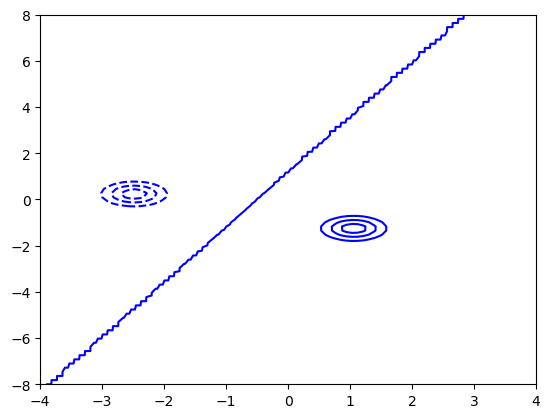

In [11]:
# Case A
cov_A = cov_c0.copy()
cov_A[1][0] = 0
cov_A[0][1] = 0
cov_A[1][1] = cov_A[0][0]

[p0_new_A, p1_new_A] = gaussian(temp, cov_A, cov_A, c0_mean, c1_mean)
classify_data(temp, p0_new_A, p1_new_A)
plotting(cov_A, cov_A, c0_mean, c1_mean)

Total Samples: 90
Accuracy for class 1: 0.975
Accuracy for class 0: 1.0
Total Accuracy: 0.9888888888888889
Confusion Matrix: [[50, 0], [1, 39]]
Misclassification Error for class 0: 0.0
Misclassification Error for class 1: 0.025


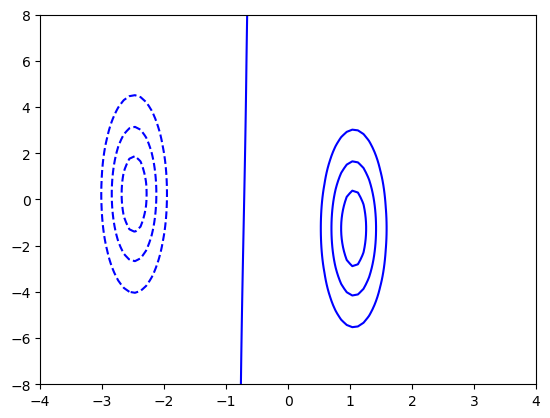

In [12]:
# Case B
cov_B = cov_c0.copy()
cov_B[1][0] = 0
cov_B[0][1] = 0

[p0_new_B, p1_new_B] = gaussian(temp, cov_B, cov_B, c0_mean, c1_mean)
classify_data(temp, p0_new_B, p1_new_B)
plotting(cov_B, cov_B, c0_mean, c1_mean)

Total Samples: 90
Accuracy for class 1: 0.975
Accuracy for class 0: 1.0
Total Accuracy: 0.9888888888888889
Confusion Matrix: [[50, 0], [1, 39]]
Misclassification Error for class 0: 0.0
Misclassification Error for class 1: 0.025


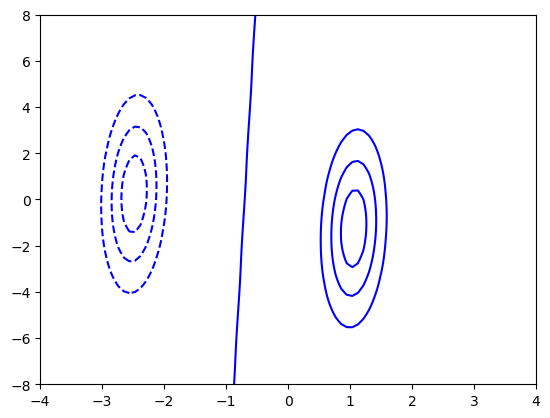

In [13]:
# Case C
cov_C = cov_c0.copy()

[p0_new_C, p1_new_C] = gaussian(temp, cov_C, cov_C, c0_mean, c1_mean)
classify_data(temp, p0_new_C, p1_new_C)
plotting(cov_C, cov_C, c0_mean, c1_mean)

Total Samples: 90
Accuracy for class 1: 1.0
Accuracy for class 0: 1.0
Total Accuracy: 1.0
Confusion Matrix: [[50, 0], [0, 40]]
Misclassification Error for class 0: 0.0
Misclassification Error for class 1: 0.0


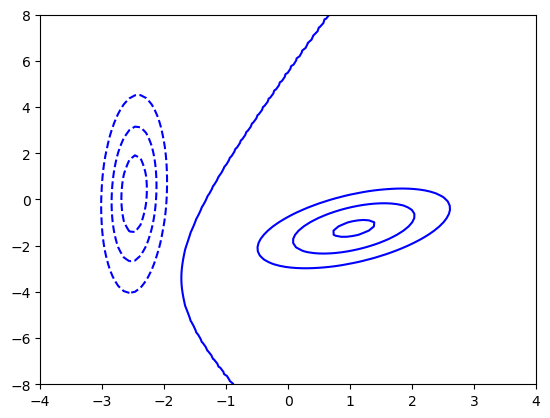

In [14]:
# Case D
[p0_new, p1_new] = gaussian(temp, cov_c0, cov_c1, c0_mean, c1_mean)
classify_data(temp, p0_new, p1_new)
plotting(cov_c0, cov_c1, c0_mean, c1_mean)